# Overfitting and Underfitting

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets

In [2]:
X, y = sklearn.datasets.make_circles(n_samples=10000, factor=.5, noise=.05)
X_val, y_val = sklearn.datasets.make_circles(n_samples=1000, factor=.5, noise=.05)

In [3]:
X[1,:]

array([0.50313078, 0.9143112 ])

In [4]:
y[1]

0

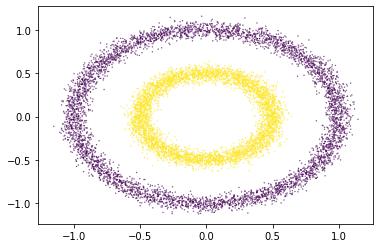

In [5]:
plt.scatter(X[:,0], X[:,1], c=y, s=.1)

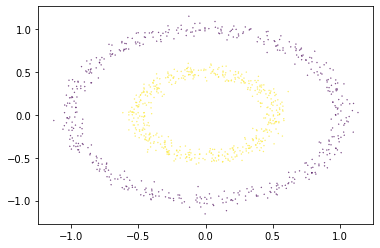

In [6]:
plt.scatter(X_val[:,0], X_val[:,1], c=y_val, s=.1)

# Logistic Regression

In [7]:
from tensorflow.keras import models
from tensorflow.keras import layers

In [9]:
network = models.Sequential()
network.add(layers.Dense(1, activation='sigmoid', input_shape=(2,)))
network.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

history = network.fit(X, y, epochs=20, batch_size=128, verbose=0)

In [10]:
history.history['accuracy'][-1]

0.5384

In [11]:
network.evaluate(X_val, y_val)

1000/1000 [==============================] - 0s 74us/sample - loss: 0.6931 - accuracy: 0.5600


[0.6931446914672852, 0.56]

In [12]:
def plot_decision_boundary(model, X, y, data=True):
    x_min = X[0,:].min() - 1
    x_max = X[0,:].max() + 1
    y_min = X[1,:].min() - 1
    y_max = X[1,:].max() + 1
    h = 0.1
    
    xr = np.arange(x_min, x_max, h)
    yr = np.arange(y_min, y_max, h)
    xx, yy = np.meshgrid(xr, yr)
    xxflat = xx.reshape(1, -1)
    yyflat = yy.reshape(1, -1)
    points = np.vstack((xxflat, yyflat)).T
    
    Z = model(points)
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.ylabel('x2')
    plt.xlabel('x1')
    if data:
        plt.scatter(X[0,:], X[1,:], c=y, cmap=plt.cm.Spectral, s=.1)

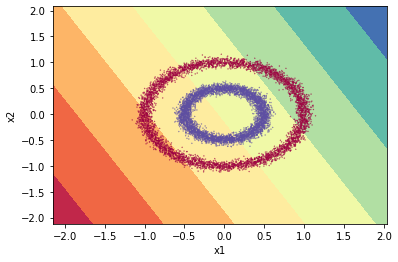

In [13]:
plot_decision_boundary(network.predict, X.T, y.T)

# 2-Neuron Hidden Layer

In [15]:
network = models.Sequential()
network.add(layers.Dense(2, activation='relu', input_shape=(2,)))
network.add(layers.Dense(1, activation='sigmoid'))
network.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

history = network.fit(X, y, epochs=100, batch_size=512, verbose=0)

In [16]:
history.history['accuracy'][-1]

0.7881

In [17]:
network.evaluate(X_val, y_val)

1000/1000 [==============================] - 0s 76us/sample - loss: 0.5122 - accuracy: 0.7950


[0.5121913959980011, 0.795]

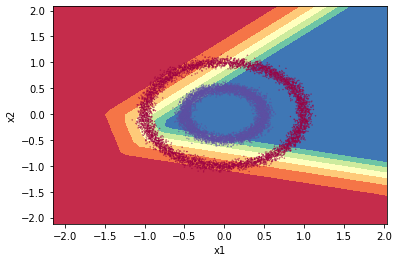

In [18]:
plot_decision_boundary(network.predict, X.T, y.T)

# 3-Neuron Hidden Layer

In [31]:
network = models.Sequential()
network.add(layers.Dense(3, activation='relu', input_shape=(2,)))
network.add(layers.Dense(1, activation='sigmoid'))
network.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

history = network.fit(X, y, epochs=100, batch_size=512, verbose=0)

In [32]:
history.history['accuracy'][-1]

0.9912

In [33]:
network.evaluate(X_val, y_val)

1000/1000 [==============================] - 0s 75us/sample - loss: 0.2709 - accuracy: 0.9960


[0.2708783557415009, 0.996]

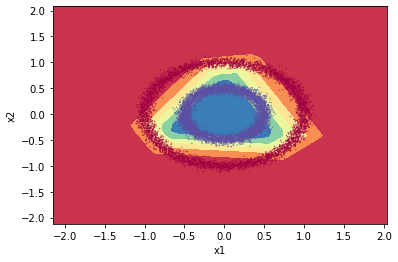

In [34]:
plot_decision_boundary(network.predict, X.T, y.T)

# 4-Neuron Hidden Layer

In [39]:
network = models.Sequential()
network.add(layers.Dense(4, activation='relu', input_shape=(2,)))
network.add(layers.Dense(1, activation='sigmoid'))
network.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

history = network.fit(X, y, epochs=100, batch_size=512, verbose=0)

In [40]:
history.history['accuracy'][-1]

0.9898

In [41]:
network.evaluate(X_val, y_val)

1000/1000 [==============================] - 0s 67us/sample - loss: 0.2364 - accuracy: 0.9930


[0.23637159824371337, 0.993]

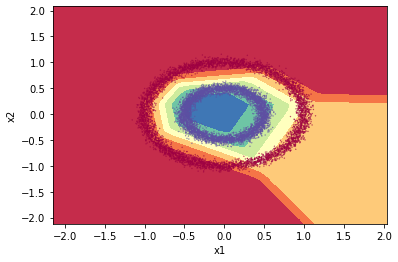

In [42]:
plot_decision_boundary(network.predict, X.T, y.T)

# 10000-Neuron Hidden Layer

In [43]:
network = models.Sequential()
network.add(layers.Dense(10000, activation='relu', input_shape=(2,)))
network.add(layers.Dense(1, activation='sigmoid'))
network.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

history = network.fit(X, y, epochs=100, batch_size=512, verbose=0)

In [44]:
history.history['accuracy'][-1]

1.0

In [45]:
network.evaluate(X_val, y_val)

1000/1000 [==============================] - 0s 69us/sample - loss: 2.6280e-06 - accuracy: 1.0000


[2.6279697991551386e-06, 1.0]

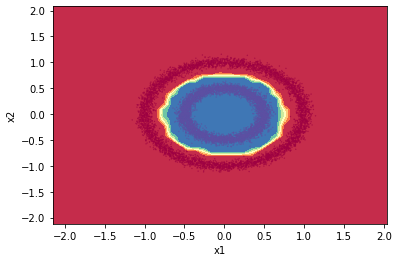

In [46]:
plot_decision_boundary(network.predict, X.T, y.T)

# Overfitting

## What happens with the same network if we have less data and more noise?

In [47]:
X, y = sklearn.datasets.make_circles(n_samples=50, factor=.5, noise=.3)
X_val, y_val = sklearn.datasets.make_circles(n_samples=50, factor=.5, noise=.3)

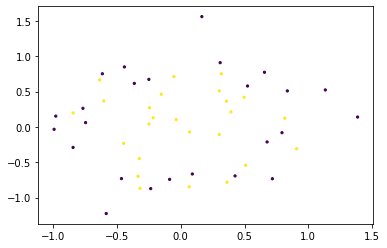

In [48]:
plt.scatter(X[:,0], X[:,1], c=y, s=5)

In [54]:
network = models.Sequential()
network.add(layers.Dense(10000, activation='relu', input_shape=(2,)))
network.add(layers.Dense(1, activation='sigmoid'))
network.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

history = network.fit(X, y, epochs=2000, batch_size=512, verbose=0, validation_data=(X_val, y_val))

In [55]:
history.history['accuracy'][-1]

0.92

In [56]:
network.evaluate(X_val, y_val)

50/50 [==============================] - 0s 82us/sample - loss: 1.3354 - accuracy: 0.6600


[1.3353696990013122, 0.66]

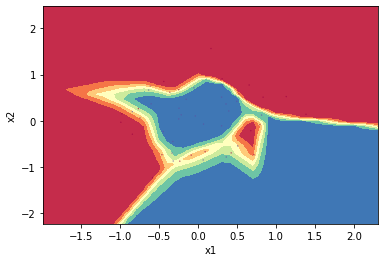

In [57]:
plot_decision_boundary(network.predict, X.T, y.T)

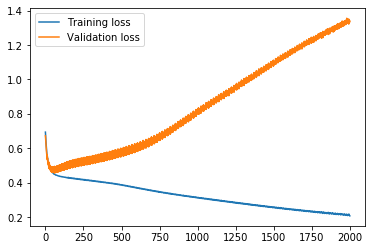

In [58]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()

# Early Stopping

In [59]:
np.argmin(history.history['val_loss'])

59

In [60]:
network = models.Sequential()
network.add(layers.Dense(10000, activation='relu', input_shape=(2,)))
network.add(layers.Dense(1, activation='sigmoid'))
network.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

history = network.fit(X, y, epochs=59, batch_size=512, verbose=0, validation_data=(X_val, y_val))

In [61]:
history.history['accuracy'][-1]

0.7

In [62]:
network.evaluate(X_val, y_val)

50/50 [==============================] - 0s 69us/sample - loss: 0.4947 - accuracy: 0.7400


[0.49473320484161376, 0.74]

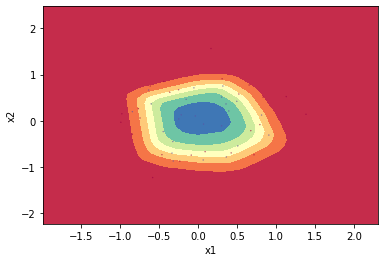

In [63]:
plot_decision_boundary(network.predict, X.T, y.T)

# Weight regularization

In [64]:
from tensorflow.keras import regularizers

In [65]:
network = models.Sequential()
network.add(layers.Dense(10000, kernel_regularizer=regularizers.l2(0.001), activation='relu', input_shape=(2,)))
network.add(layers.Dense(1, activation='sigmoid'))
network.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

history = network.fit(X, y, epochs=2000, batch_size=512, verbose=0, validation_data=(X_val, y_val))

In [66]:
history.history['accuracy'][-1]

0.84

In [67]:
network.evaluate(X_val, y_val)

50/50 [==============================] - 0s 155us/sample - loss: 0.7533 - accuracy: 0.7400


[0.7532513785362244, 0.74]

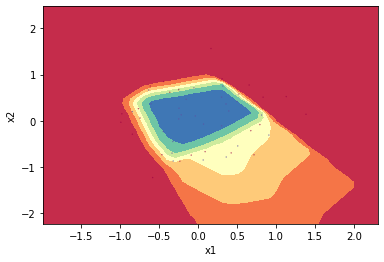

In [68]:
plot_decision_boundary(network.predict, X.T, y.T)

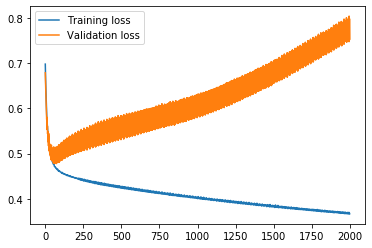

In [69]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()

# Dropout

In [70]:
network = models.Sequential()
network.add(layers.Dense(10000, activation='relu', input_shape=(2,)))
network.add(layers.Dropout(0.5))
network.add(layers.Dense(1, activation='sigmoid'))
network.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

history = network.fit(X, y, epochs=2000, batch_size=512, verbose=0, validation_data=(X_val, y_val))

In [71]:
history.history['accuracy'][-1]

0.9

In [72]:
network.evaluate(X_val, y_val)

50/50 [==============================] - 0s 94us/sample - loss: 1.1697 - accuracy: 0.6600


[1.1697048914432526, 0.66]

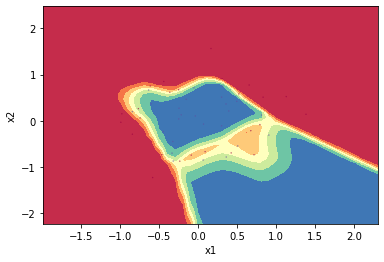

In [73]:
plot_decision_boundary(network.predict, X.T, y.T)

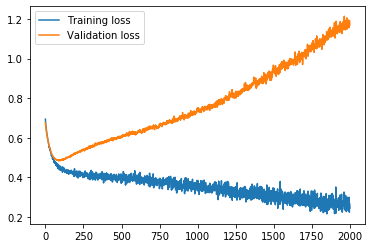

In [74]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()

# More Data

In [75]:
more_X, more_y = sklearn.datasets.make_circles(n_samples=50000, factor=.5, noise=.3)
more_X_val, more_y_val = sklearn.datasets.make_circles(n_samples=1000, factor=.5, noise=.3)

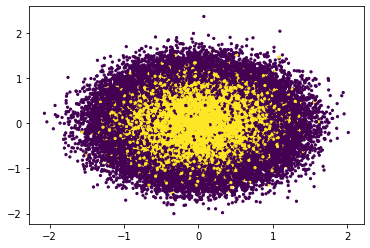

In [76]:
plt.scatter(more_X[:,0], more_X[:,1], c=more_y, s=5)

In [77]:
network = models.Sequential()
network.add(layers.Dense(10000, activation='relu', input_shape=(2,)))
network.add(layers.Dense(1, activation='sigmoid'))
network.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

history = network.fit(more_X, more_y, epochs=100, batch_size=512, verbose=0, validation_data=(more_X_val, more_y_val))

In [78]:
history.history['accuracy'][-1]

0.78444

In [81]:
network.evaluate(more_X_val, more_y_val)

1000/1000 [==============================] - 0s 29us/sample - loss: 0.4597 - accuracy: 0.7930


[0.4596541805267334, 0.793]

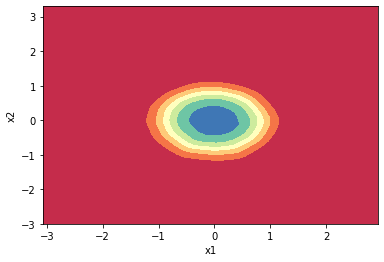

In [83]:
plot_decision_boundary(network.predict, more_X.T, more_y.T, False)

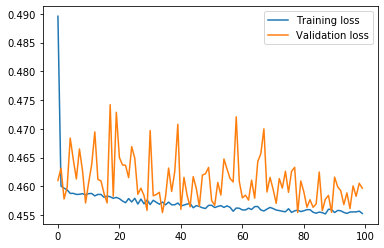

In [84]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()